Centroids:
[[ 0.8916814   0.04741398 -0.62080368]
 [-0.43033758  1.02223317  1.15593564]
 [-0.93381128 -0.67979753  0.1338202 ]]

Labels:
[2 2 2 2 2 2 2 2 0 2 0 2 0 2 2 2 2 2 0 2 2 2 0 2 0 2 0 2 2 2 0 2 0 2 0 2 0
 2 2 2 0 2 0 2 0 2 0 2 2 2 0 2 2 0 0 0 0 0 2 0 0 2 0 0 0 2 0 0 2 2 0 0 0 0
 0 2 0 0 2 0 0 2 0 0 2 0 0 2 2 0 0 2 0 0 2 2 0 2 0 2 2 0 0 2 0 2 0 0 0 0 0
 2 0 2 2 2 0 0 0 0 2 0 1 1 2 1 0 1 0 1 0 1 2 1 2 1 0 1 2 1 0 1 2 1 2 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 2 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1]


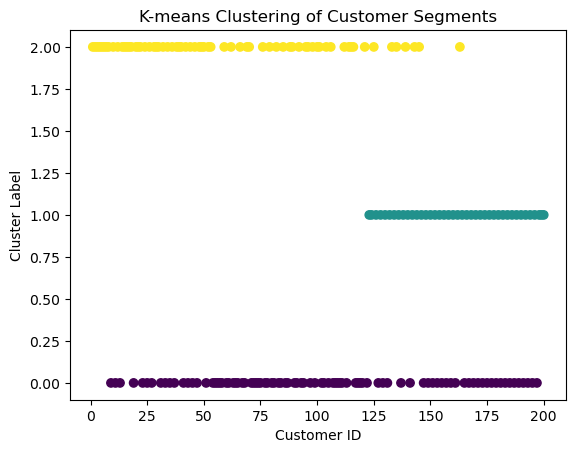

In [20]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
df = pd.read_csv('Mall_Customers.csv')

# Drop duplicates
df.drop_duplicates(inplace=True)

# Encode the categorical column 'Gender'
encoder = LabelEncoder()
gender_encoded = encoder.fit_transform(df['Gender'])
df['Gender'] = gender_encoded

# Replace missing values with the mean of the column
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Normalize the data
scaler = StandardScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]), columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])

# Select the relevant features  
X = df_normalized[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# K-means clustering
kmeans = KMeans(n_clusters=3, n_init=10, max_iter=300, random_state=0)
kmeans.fit(X)
identified_clusters = kmeans.predict(X)

# Centroids
centroids = kmeans.cluster_centers_
print("Centroids:")
print(centroids)

# Getting the labels assigned to each data point
labels = kmeans.labels_
print("\nLabels:")
print(labels)

# Visualize the resulting clusters
plt.scatter(df['CustomerID'], labels, c=labels, cmap='viridis')
plt.xlabel('Customer ID')
plt.ylabel('Cluster Label')
plt.title('K-means Clustering of Customer Segments')
plt.show()






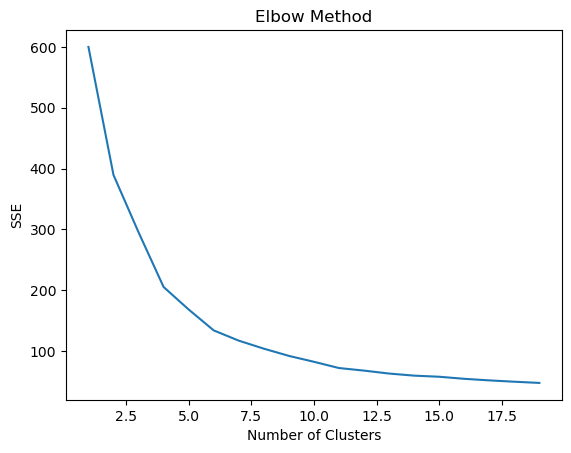

In [21]:
# Elbow Method to determine the optimal number of clusters
sse = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k,n_init=10, max_iter=300, random_state=0)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
number_clusters = range(1,20)
plt.plot(number_clusters, sse)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()


Question 2

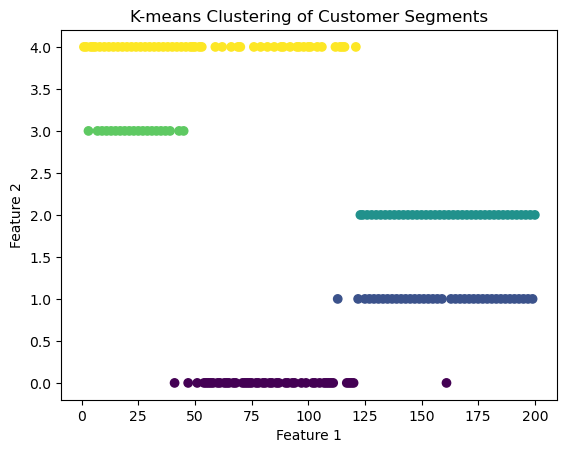

In [22]:
# Assuming the optimum number of clusters is 3 and you have new data 'new_data'
new_data = X
kmeans = KMeans(n_clusters=5, max_iter=300, n_init=10, random_state=0)
kmeans.fit(X)
labels = kmeans.predict(new_data)
# print(labels)

# Visualize the resulting clusters
plt.scatter(df['CustomerID'], labels, c=labels, label='centroids', cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering of Customer Segments')
plt.show()

data_with_clusters = data.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c=data_with_clusters['Clusters'],cmap='rainbow')